In [1]:
# Q1. We can find null values or missing values, fill these missing values, find duplicate values and remove these, remove columns which is not useful, detect outliers and remove outlier (using ZScore), Encoding(OneHotEncoder, OrdinalEncoder, LabelEncoder).
  # How we can find dashes values or other values or things.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

# For Encoding -->
  # 1. for OneHotEncoder -:
    # from sklearn.preprocessing import OneHotEncoder  ---> then -> make variable -> ohe = OneHotEncoder(drop = "first", sparse_output = False, dtype = np.int32) --> then-> df = ohe.fit_transform(df) -> df -> then -> df1 = pd.DataFrame(df) -> df1.head(3). 

  # 2. for OrdinalEncoder -:
    # from sklearn.preprocessing import OrdinalEncoder ---> then -> make variable with give lables -> oe = OrdinalEncoder(categories = [["Poor", "Average", "Good"], ["School", "UG", "PG"], ["Male", "Female"]]) -> df1 = oe.fit_transform(df) -> df1 --> then -> df2 = pd.DataFrame(df1, columns = ['review', 'education', 'gender', 'pruchased']) -> df2.head(3)

  # 3. for LabelEncoder
    # from sklearn.preprocessing import LabelEncoder ---> then -> le=LabelEncoder() --> then -> for i in categorical: print(i) --> for i in categorical: df[i] = le.fit_transform(df[i]) --> df.head().

In [3]:
# We are working on "cars.csv" file

In [4]:
df = pd.read_csv("cars.csv")
df.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [5]:
# Encoding --> converting text data to numeric data
 # Types of Encoding --> 1. OneHotEncoder,    2. Ordinal Encoding

In [6]:
####################################################################################################

In [7]:
# first we are try to this on Dummy_data

In [8]:
# Dummy_data
d1 = {"Name" : ["Abhisehk", "Naman", "Rohit"]}
d1

{'Name': ['Abhisehk', 'Naman', 'Rohit']}

In [9]:
d2 = pd.DataFrame(d1) # DataFrame convert data into data_formate.
d2

,Name
0,Abhisehk
1,Naman
2,Rohit


In [10]:
name = pd.get_dummies(d2['Name']).astype(int)

In [11]:
name

,Abhisehk,Naman,Rohit
0,1,0,0
1,0,1,0
2,0,0,1


In [12]:
name = pd.get_dummies(d2['Name'], drop_first = True).astype(int)

In [13]:
name

,Naman,Rohit
0,0,0
1,1,0
2,0,1


In [14]:
# like that, we have to do this work on my data for Encoding.

In [15]:
####################################################################################################

In [16]:
# Now Working on original data. file --> "cars.csv"

In [17]:
df = pd.read_csv("cars.csv")
df.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [18]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [19]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [20]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [21]:
# start work (like as same dummy_data)
owner = df['owner']
owner

0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
8123             First Owner
8124    Fourth & Above Owner
8125             First Owner
8126             First Owner
8127             First Owner
Name: owner, Length: 8128, dtype: object

In [22]:
owner = (pd.get_dummies(owner, drop_first = True)).astype(int)
owner

,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8123,0,0,0,0
8124,1,0,0,0
8125,0,0,0,0
8126,0,0,0,0


In [23]:
fuel = df['fuel']
fuel = (pd.get_dummies(fuel, drop_first=True)).astype(int)
fuel

,Diesel,LPG,Petrol
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
8123,0,0,1
8124,1,0,0
8125,1,0,0
8126,1,0,0


In [24]:
brand = df['brand']
brand = (pd.get_dummies(brand, drop_first=True)).astype(int)
brand

,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
df1 = pd.concat([df, fuel, owner, brand], axis=1)

In [26]:
df.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [27]:
df1.head(3)

,brand,km_driven,fuel,owner,selling_price,Diesel,LPG,Petrol,Fourth & Above Owner,Second Owner,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti,145500,Diesel,First Owner,450000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Skoda,120000,Diesel,Second Owner,370000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,Honda,140000,Petrol,Third Owner,158000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.drop(["fuel", "owner", "brand"], axis = 1, inplace = True)
df.head(3) 

,km_driven,selling_price
0,145500,450000
1,120000,370000
2,140000,158000


In [29]:
# Again read file
ds = pd.read_csv("cars.csv")
ds.head(3)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000


In [30]:
ds = ds[['brand', 'owner', 'fuel']]

In [31]:
ds.head(3)

,brand,owner,fuel
0,Maruti,First Owner,Diesel
1,Skoda,Second Owner,Diesel
2,Honda,Third Owner,Petrol


In [32]:
# Using Encoding -->

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe = OneHotEncoder(drop = "first", sparse_output=False, dtype=np.int32)

In [35]:
ds = ohe.fit_transform(ds) # Learn and convert

In [36]:
ds

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [37]:
ds1 = pd.DataFrame(ds)
ds1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [38]:
# OneHotEncoding is completed here.

In [39]:
###################################################################################################

In [40]:
###################################################################################################

In [41]:
# Now working on data with second type of Encoding --> OrdinalEncoder

In [42]:
dataset = pd.read_csv("customer.csv")
dataset.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [43]:
dataset['review'].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [44]:
dataset['gender'].value_counts()

gender
Female    29
Male      21
Name: count, dtype: int64

In [45]:
dataset['education'].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [46]:
dataset['purchased'].value_counts()

purchased
No     26
Yes    24
Name: count, dtype: int64

In [47]:
# Manually give encoding for review ---> Poor:0, Average:1, Good:2
dataset['review'] = dataset['review'].map({"Poor":0, "Average":1, "Good":2})
dataset.head(3)

,age,gender,review,education,purchased
0,30,Female,1,School,No
1,68,Female,0,UG,No
2,70,Female,2,PG,No


In [48]:
# Manually give encoding for education ---> PG:0, School:1, UG:2
dataset['education'] = dataset['education'].map({"School":0, "UG":1, "PG":2})
dataset.head(3)

,age,gender,review,education,purchased
0,30,Female,1,0,No
1,68,Female,0,1,No
2,70,Female,2,2,No


In [49]:
# Manually give encoding for Gender --> Female:0, Male:1
dataset['gender'] = dataset['gender'].map({"Female":0, "Male":1})
dataset.head(3)

,age,gender,review,education,purchased
0,30,0,1,0,No
1,68,0,0,1,No
2,70,0,2,2,No


In [50]:
# Manually give encoding for Purchased --> Yes:0, No:1
dataset['purchased'] = dataset['purchased'].map({"Yes":0, "No":1})
dataset.head(3)

,age,gender,review,education,purchased
0,30,0,1,0,1
1,68,0,0,1,1
2,70,0,2,2,1


In [51]:
# using OrdinalEncoding
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [52]:
# Read file again
dataset1 = pd.read_csv("customer.csv")
dataset1.head(3)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No


In [53]:
dataset2 = dataset1[["review", "education", "gender", "purchased"]]
dataset2.head(3)

,review,education,gender,purchased
0,Average,School,Female,No
1,Poor,UG,Female,No
2,Good,PG,Female,No


In [54]:
oe = OrdinalEncoder(categories = [["Poor", "Average", "Good"], ["School", "UG", "PG"], ["Male", "Female"], ["Yes", "No"]])
dataset3 = oe.fit_transform(dataset2)
dataset3

array([[1., 0., 1., 1.],
       [0., 1., 1., 1.],
       [2., 2., 1., 1.],
       [2., 2., 1., 1.],
       [1., 1., 1., 1.],
       [1., 0., 1., 0.],
       [2., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 1., 1.],
       [2., 1., 0., 0.],
       [2., 1., 1., 0.],
       [2., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 1., 1.],
       [0., 2., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [2., 0., 0., 1.],
       [0., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 2., 0., 1.],
       [0., 2., 1., 0.],
       [2., 0., 1., 1.],
       [1., 2., 1., 0.],
       [2., 0., 1., 1.],
       [0., 2., 1., 1.],
       [0., 2., 1., 1.],
       [0., 0., 0., 1.],
       [1., 1., 1., 0.],
       [1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 0.],
       [2., 2., 1., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [2., 1., 1., 0.],
       [1., 2., 0., 0.],
       [2., 0., 1., 1.],
       [0., 2., 0., 1.],


In [55]:
dataset4 = pd.DataFrame(dataset3, columns=["review", "education", "gender", "pruchased"])
dataset4.head(3)

,review,education,gender,pruchased
0,1.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,2.0,2.0,1.0,1.0


In [56]:
dataset5 = pd.concat([dataset4,dataset2], axis=1)
dataset5.head()

,review,education,gender,pruchased,review,education,gender,purchased
0,1.0,0.0,1.0,1.0,Average,School,Female,No
1,0.0,1.0,1.0,1.0,Poor,UG,Female,No
2,2.0,2.0,1.0,1.0,Good,PG,Female,No
3,2.0,2.0,1.0,1.0,Good,PG,Female,No
4,1.0,1.0,1.0,1.0,Average,UG,Female,No


In [57]:
# Complete it --> Completed Second type of Encoding -------> OrdinalEncoding.

In [58]:
####################################################################################################

In [59]:
####################################################################################################

In [60]:
# Now we are working for Third type of Encoding ---> "LabelEncoding"

In [61]:
lp = pd.read_csv("loan_prediction.csv")
lp.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [62]:
lp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
lp.shape

(614, 13)

In [65]:
lp['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [66]:
lp['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [67]:
# Filling missing values--------------------

# Gender
lp["Gender"].fillna("Unknown", inplace = True)

# Married
lp['Married'].fillna(lp['Married'].mode()[0], inplace=True)

# Dependents
lp['Dependents'].fillna(lp['Dependents'].mode()[0], inplace=True)

# Self_Employed
lp['Self_Employed'].fillna("NA", inplace = True)

# Loan_Amount_Term
lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].mode()[0], inplace=True)

# LoanAmount
lp['LoanAmount'].fillna(lp['LoanAmount'].median(), inplace=True)

# Credit_History
lp['Credit_History'].fillna(lp['Credit_History'].mode()[0], inplace = True)

In [68]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
lp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
# This is encoding----
# Now we are seperating numerical columns from this data.

numerical = lp.select_dtypes(exclude = "object")
numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [71]:
# Seperate categorical columns from this data.

categorical = lp.select_dtypes(include = "object")
categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [72]:
# Now we are starting process of LabelEncoding

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
for i in categorical:
    print(i)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [76]:
lp.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [77]:
for i in categorical:
    lp[i] = le.fit_transform(lp[i])

In [78]:
lp.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1


In [118]:
# ML part start ---> Logistic regression.
lp.skew() 

Loan_ID              0.000000
Gender              -0.953015
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [119]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [120]:
lp[skew] = scaler.fit_transform(lp[skew].values)
lp[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931


In [121]:
lp.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        0.491660
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [122]:
X = lp.drop(['Loan_Status'], axis = 1)
Y = lp['Loan_Status']

In [124]:
# Standart Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [125]:
# ML Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [129]:
# Finding Best Random State ---> (we written 42 in LinearRegression)

maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.3, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is', maxAccu, 'on Random_state', maxRS)

Best accuracy is 0.8648648648648649 on Random_state 8


In [132]:
# Logistic Regression Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state = 8, test_size = .3)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

In [133]:
# from sklearn.metrics import classification_report
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69        29
           1       0.99      0.85      0.91       156

    accuracy                           0.86       185
   macro avg       0.77      0.91      0.80       185
weighted avg       0.92      0.86      0.88       185



In [134]:
lp['LoanAmount'].value_counts()

LoanAmount
-0.025462    33
-0.155876    20
-0.330910    17
-0.521591    15
 0.429266    12
             ..
 1.270528     1
 1.030675     1
-1.556879     1
 0.504852     1
 1.381387     1
Name: count, Length: 203, dtype: int64

In [ ]:
# Steps --->
# Missing value
# encoding
# zscore
# skewness
# seperate X,Y
# scaling
# ML

In [ ]:
# When we use this algo --> LogisticRegression then must balanced the data.

In [137]:
print(confusion_matrix(y_pred, Y_test)) # here diagonal matrix must increase ---> it means accuracy is good.

[[ 28   1]
 [ 24 132]]


In [ ]:
# completed this project.

In [80]:
# Encoding is completed for that dataset.

In [81]:
###################################################################################################

In [82]:
# Now we are practicing for third type of Encoding --> "LabelEncoding"

In [83]:
# Now I'am working same Encoding -> LabelEncoding -----> for other data.

In [84]:
ad = pd.read_csv("Telecom_customer_churn.csv")
ad.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [85]:
ad.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
ad.drop(['customerID'], axis=1, inplace = True)

In [88]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [89]:
ad.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [90]:
ad.duplicated().sum()

22

In [91]:
ad.shape

(7043, 20)

In [92]:
ad.drop_duplicates(keep = "last", inplace = True)

In [93]:
ad.shape

(7021, 20)

In [94]:
ad.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
ad['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [96]:
# In this data --> here is no missing values or null values but present "dashes" in many places like (----).

In [97]:
# So we have to handle this dashes for optimization.

In [98]:
ad[ad["TotalCharges"].isin([' ', 'NA', '-']) == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [99]:
# There is possibility of Whitespaces in TotalCharges column. Lets deal with it.

In [100]:
# here we are replacing whitespaces into null values.
ad['TotalCharges'] = ad['TotalCharges'].replace(' ', np.nan)

In [101]:
# Converting object datatype into float.
ad['TotalCharges'] = ad['TotalCharges'].astype(float)

In [102]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

<Axes: ylabel='TotalCharges'>

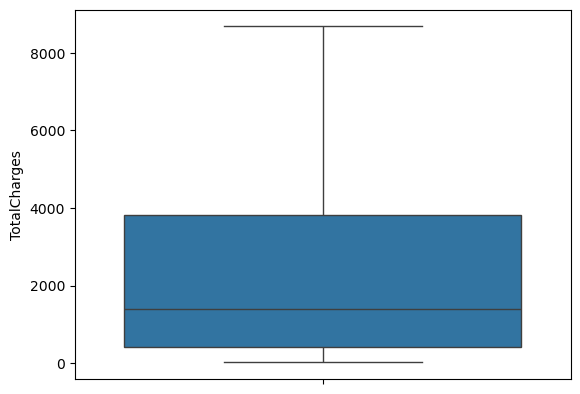

In [103]:
sns.boxplot(ad['TotalCharges'])

In [104]:
ad['TotalCharges'].isnull().sum()

11

In [105]:
ad.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [106]:
# Filling Missing values
ad['TotalCharges'].fillna(ad['TotalCharges'].mean(), inplace = True)

In [107]:
ad.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
# Seperating Numerical and Categorical values from the data.

numerical = ad.select_dtypes(exclude = "object")

numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [109]:
categorical = ad.select_dtypes(include = "object")
categorical

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le = LabelEncoder()

In [112]:
for i in categorical:
    ad[i] = le.fit_transform(ad[i])

In [113]:
ad.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [114]:
# Complete this LabelEncoding for this dataset.

In [115]:
################################################################################################################

In [116]:
################################################################################################################

In [117]:
# Now working on other dataset --> "HR-Employee-Attrition.csv"